# Reto-> Entrega 2 (18/11) -> Clasificación-ensambles y presentación ejecutiva

**Nombre 1:** Daniela Estevez Rodriguez

**Matricula 1:** A01793723
<br>
<br>

**Nombre 2:** Ernesto Nicanor Santillán Guerrero 

**Matricula 2:** A01793675



**Materia:** Ciencia y analítica de datos

**Profesor:** María de la Paz Rico Fernández

**Fecha:** 17 de Noviembre de 2022

In [81]:
# Librerías

# Para ayudar a que el código esté mejor estructurado (buenas prácticas)
%load_ext nb_black

# Para omitir los mensajes de warnings
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import os
import fiona

import geopandas as gpd

# from shapely.geometry import Point

from sklearn.model_selection import train_test_split

# from sklearn.model_selection import (cross_val_score,
#    cross_validate,
#    RepeatedStratifiedKFold,
#    learning_curve,
#    validation_curve)

from sklearn.preprocessing import OrdinalEncoder

# from sklearn.preprocessing import OneHotEncoder

# from sklearn.preprocessing import RobustScaler

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# from sklearn.metrics import confusion_matrix, make_scorer

# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

pd.options.display.max_columns = 60
pd.options.display.max_rows = 70

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [82]:
# Directorio local
# path = "/Users/danielaestevezrodriguez/Documents/Educación continua y posgrados/Tec de Monterrey/2do Trimestre/Ciencia y analítica de datos/Actividades grupales/Reto _1/Datos_de_calidad_del_agua_2020/"
path = "/Users/santien/reto_1/"
os.listdir(path)

['Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
 'Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz',
 'doc_subterraneas.kml',
 'doc_superficiales.kml',
 'Escalas_subterranea.csv',
 'Escalas_superficial.csv']

<IPython.core.display.Javascript object>

In [83]:
# Documentos
file1 = "doc_subterraneas.kml"
file2 = (
    "Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv"
)
file3 = "Escalas_subterranea.csv"

<IPython.core.display.Javascript object>

In [84]:
# Descarga kml subterraneas
if os.path.exists(path + file1):
    fiona.drvsupport.supported_drivers["KML"] = "rw"
    df_subterraneas = gpd.read_file(path + file1, driver="KML")

# Algunos rows de subterraneas
df_subterraneas.head()

,Name,Description,geometry
0,,,POINT Z (-102.02210 22.20887 0.00000)
1,,,POINT Z (-102.20075 21.99958 0.00000)
2,,,POINT Z (-102.28801 22.36685 0.00000)
3,,,POINT Z (-102.29449 22.18435 0.00000)
4,,,POINT Z (-110.24480 23.45138 0.00000)


<IPython.core.display.Javascript object>

In [85]:
# Descarga csv calidad subterraneas
if os.path.exists(path + file2):
    df_calidad_agua_sub = pd.read_csv(path + file2, encoding="latin1")

# Algunos rows de subterraneas
df_calidad_agua_sub.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


<IPython.core.display.Javascript object>

In [86]:
# Descarga csv escalas subterraneas
if os.path.exists(path + file3):
    df_escala_sub = pd.read_csv(path + file3, encoding="latin1")

# Algunos rows de subterraneas
df_escala_sub.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


<IPython.core.display.Javascript object>

## Limpieza de base de datos.

**Omitimos la exploración de datos realizada en la entrega anterior**

**Eliminamos variable que no nos sirven**

In [87]:
# eliminar columna con puros nulls
df_calidad_agua_sub.drop("SDT_mg/L", axis=1, inplace=True)

# eliminar columna que no nos dan información porque son claves únicas
df_calidad_agua_sub.drop("CLAVE", axis=1, inplace=True)

# eliminar columna que no nos dan información porque casi todos son valores únicos (solo se repite 1)
df_calidad_agua_sub.drop("SITIO", axis=1, inplace=True)

# eliminar columna que no nos dan información porque solo toma un valor
df_calidad_agua_sub.drop("PERIODO", axis=1, inplace=True)

<IPython.core.display.Javascript object>

**Conversión de columnas a numéricas**

In [88]:
def convert_to_numeric(item):
    if type(item) == str:
        item = item.strip("<")
    return float(item)

<IPython.core.display.Javascript object>

In [89]:
# Columnas para convertir en numericas
col_a_numeric = [
    item
    for item in df_calidad_agua_sub.loc[:, "SDT_M_mg/L":"FE_TOT_mg/L"].columns
    if "CALIDAD" not in item
]

<IPython.core.display.Javascript object>

In [90]:
# Convertimos columnas a numericas
for col in col_a_numeric:
    df_calidad_agua_sub[col] = df_calidad_agua_sub[col].apply(convert_to_numeric)

<IPython.core.display.Javascript object>

**Cambiar a ordinales las variables de calidad**

Se realizara en a traves de un pipeline con el apoyo de OrdinalEncoder.

**Datos faltantes**

Usaremos un pipeline para evitar data leaking al rellenar datos faltates.

- Datos numericos usaremos mediana.
- Variable CONTAMINANTES usaremos "Ninguno".
- Variables binarias, categóricas y ordinales usaremos la moda.

**Codificar las variables categóricas para convertirlas a numericas**

Debido a la cantidad de valores que toman (la que menos es SUBTIPO y toma 8 valores) usaremos OrdinalEncoder en vez de OneHotEncoder. La transformación se realizará dentro de un pipeline.

**Escalamiento de datos**

No es necesario ya que ni los árboles de decisión ni los bosques aleatorios se ven afectados por rango distinto u outliers.

## 1. Selecciona tus variables independientes X y dependiente Y (semáforo)

In [91]:
# Definamos las variables de entrada y de salida
X = pd.concat(
    [df_calidad_agua_sub.iloc[:, :36], df_calidad_agua_sub.iloc[:, 37:]], axis=1
).copy()
Y = df_calidad_agua_sub[["SEMAFORO"]]

<IPython.core.display.Javascript object>

## 2. Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]

Realizamos la transformación a través de un pipeline apoyados de OrdinalEncoder.

**Pipeline para SEMAFORO**

In [92]:
# Pipeline para variable y
y_pipeline = Pipeline(steps=[("OrdE", OrdinalEncoder())])
y_pipeline_nombres = ["SEMAFORO"]

<IPython.core.display.Javascript object>

In [93]:
# Transformamos variable SEMAFORO
Yy = y_pipeline.fit_transform(Y)

<IPython.core.display.Javascript object>

In [94]:
y_pipeline.named_steps.OrdE.categories_

[array(['Amarillo', 'Rojo', 'Verde'], dtype=object)]

<IPython.core.display.Javascript object>

**Pipeline para X**

In [95]:
# Pipeline para  variables numéricas
num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])
num_pipeline_nombres = [
    "LONGITUD",
    "LATITUD",
    "ALC_mg/L",
    "CONDUCT_mS/cm",
    "SDT_M_mg/L",
    "FLUORUROS_mg/L",
    "DUR_mg/L",
    "COLI_FEC_NMP/100_mL",
    "N_NO3_mg/L",
    "AS_TOT_mg/L",
    "CD_TOT_mg/L",
    "CR_TOT_mg/L",
    "HG_TOT_mg/L",
    "PB_TOT_mg/L",
    "MN_TOT_mg/L",
    "FE_TOT_mg/L",
]

# Pipeline para variables CONTAMINANTES
cont_pipeline = Pipeline(
    steps=[
        ("imputer1", SimpleImputer(strategy="constant", fill_value="Ninguno")),
        (
            "OrdE",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        ),
        ("imputer2", SimpleImputer(strategy="most_frequent")),
    ]
)
cont_pipeline_nombres = ["CONTAMINANTES"]

# Pipeline para variables categóricas
cat_pipeline = Pipeline(
    steps=[
        ("imputer1", SimpleImputer(strategy="most_frequent")),
        (
            "OrdE",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        ),
        ("imputer2", SimpleImputer(strategy="most_frequent")),
    ]
)
cat_pipeline_nombres = [
    "ORGANISMO_DE_CUENCA",
    "ESTADO",
    "MUNICIPIO",
    "ACUIFERO",
    "SUBTIPO",
]

# Pipeline para  variables ordinales
ord_pipeline = Pipeline(
    steps=[
        ("imputer1", SimpleImputer(strategy="most_frequent")),
        (
            "OrdE",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        ),
        ("imputer2", SimpleImputer(strategy="most_frequent")),
    ]
)
ord_pipeline_nombres = [
    "CALIDAD_ALC",
    "CALIDAD_CONDUC",
    "CALIDAD_SDT_ra",
    "CALIDAD_SDT_salin",
    "CALIDAD_FLUO",
    "CALIDAD_DUR",
    "CALIDAD_COLI_FEC",
    "CALIDAD_N_NO3",
    "CALIDAD_AS",
    "CALIDAD_CD",
    "CALIDAD_CR",
    "CALIDAD_HG",
    "CALIDAD_PB",
    "CALIDAD_MN",
    "CALIDAD_FE",
    "CUMPLE_CON_ALC",
    "CUMPLE_CON_COND",
    "CUMPLE_CON_SDT_ra",
    "CUMPLE_CON_SDT_salin",
    "CUMPLE_CON_FLUO",
    "CUMPLE_CON_DUR",
    "CUMPLE_CON_CF",
    "CUMPLE_CON_NO3",
    "CUMPLE_CON_AS",
    "CUMPLE_CON_CD",
    "CUMPLE_CON_CR",
    "CUMPLE_CON_HG",
    "CUMPLE_CON_PB",
    "CUMPLE_CON_MN",
    "CUMPLE_CON_FE",
]

# Conjuntamos las transformaciones numéricas, categóricas, ordinales y binarias que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("numerica", num_pipeline, num_pipeline_nombres),
        ("contaminantes", cont_pipeline, cont_pipeline_nombres),
        ("categorica", cat_pipeline, cat_pipeline_nombres),
        ("ordinaria", ord_pipeline, ord_pipeline_nombres),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

## 3. Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [96]:
# Se crea el objeto del modelo
tree = Pipeline(
    steps=[("ct", columnasTransformer), ("m", DecisionTreeClassifier(random_state=1))]
)

# Se entrena el modelo
tree.fit(X, Yy)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerica',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['LONGITUD', 'LATITUD',
                                                   'ALC_mg/L', 'CONDUCT_mS/cm',
                                                   'SDT_M_mg/L',
                                                   'FLUORUROS_mg/L', 'DUR_mg/L',
                                                   'COLI_FEC_NMP/100_mL',
                                                   'N_NO3_mg/L', 'AS_TOT_mg/L',
                                                   'CD_TOT_mg/L', 'CR_TOT_mg/L',
                                                   'HG_TOT_mg/L', 'PB_TOT_mg/L',
                                                   'M...


<IPython.core.display.Javascript object>

In [97]:
# Importancia de variables
print(
    pd.DataFrame(
        tree["m"].feature_importances_, columns=["Imp"], index=X.columns
    ).sort_values(by="Imp", ascending=False)
)

                           Imp
DUR_mg/L              0.652072
CUMPLE_CON_FLUO       0.121491
CUMPLE_CON_NO3        0.076984
MUNICIPIO             0.046079
CUMPLE_CON_CR         0.027445
ALC_mg/L              0.025138
CONDUCT_mS/cm         0.024890
ESTADO                0.009341
CALIDAD_SDT_salin     0.005550
CUMPLE_CON_CD         0.002867
CALIDAD_SDT_ra        0.002840
CUMPLE_CON_CF         0.002781
ACUIFERO              0.002521
FE_TOT_mg/L           0.000000
CUMPLE_CON_COND       0.000000
CALIDAD_MN            0.000000
CALIDAD_FE            0.000000
MN_TOT_mg/L           0.000000
CONTAMINANTES         0.000000
CUMPLE_CON_ALC        0.000000
ORGANISMO_DE_CUENCA   0.000000
CUMPLE_CON_SDT_ra     0.000000
CUMPLE_CON_SDT_salin  0.000000
CUMPLE_CON_DUR        0.000000
PB_TOT_mg/L           0.000000
CUMPLE_CON_AS         0.000000
CUMPLE_CON_HG         0.000000
CUMPLE_CON_PB         0.000000
CUMPLE_CON_MN         0.000000
CALIDAD_PB            0.000000
CR_TOT_mg/L           0.000000
CALIDAD_

<IPython.core.display.Javascript object>

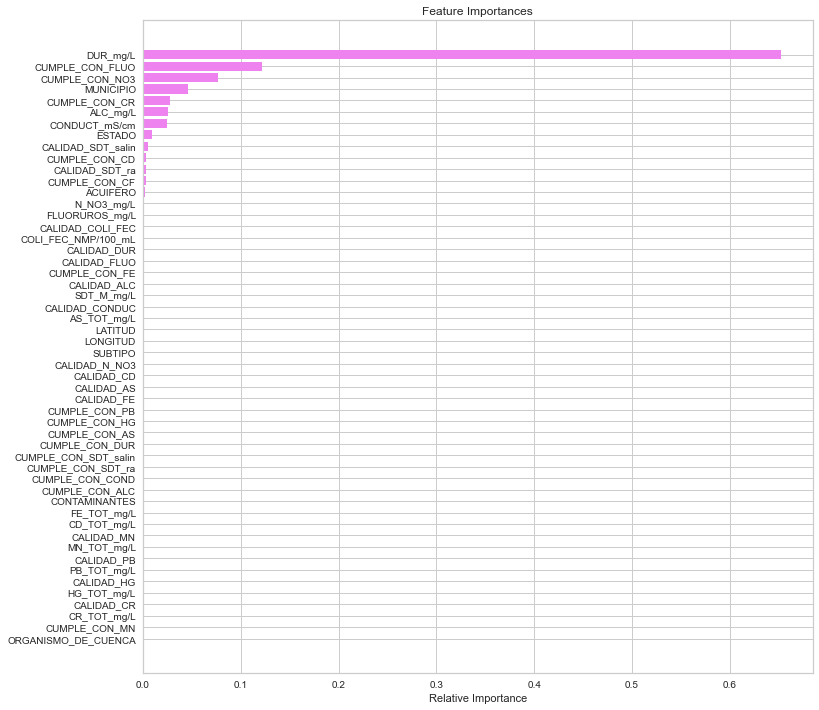

<IPython.core.display.Javascript object>

In [98]:
# Lista de nombres de variables
feature_names = list(X.columns)

# Gráfico de importancia de variables
importances = tree["m"].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## 4. Selecciona las variables de mayor importancia.

Como se observa en el gráfico anterior las variables de mayor importancia son DUR_mg/L, CUMPLE_CON_FLUO, CUMPLE_CON_NO3 y MUNICIPIO. Vemos tambien que las variables de CUMPLE son muy prominentes. Para iniciar solo voy a utilar esas variables de entrada para el modelo


In [99]:
# Definamos las variables de entrada y de salida
X = pd.concat(
    [
        df_calidad_agua_sub.iloc[:, 38:],
    ],
    axis=1,
).copy()
Y = df_calidad_agua_sub[["SEMAFORO"]]

<IPython.core.display.Javascript object>

**Pipeline para X**

In [100]:
# Pipeline para  variables ordinales
ord_pipeline = Pipeline(
    steps=[
        ("imputer1", SimpleImputer(strategy="most_frequent")),
        (
            "OrdE",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan),
        ),
        ("imputer2", SimpleImputer(strategy="most_frequent")),
    ]
)
ord_pipeline_nombres = [
    "CUMPLE_CON_ALC",
    "CUMPLE_CON_COND",
    "CUMPLE_CON_SDT_ra",
    "CUMPLE_CON_SDT_salin",
    "CUMPLE_CON_FLUO",
    "CUMPLE_CON_DUR",
    "CUMPLE_CON_CF",
    "CUMPLE_CON_NO3",
    "CUMPLE_CON_AS",
    "CUMPLE_CON_CD",
    "CUMPLE_CON_CR",
    "CUMPLE_CON_HG",
    "CUMPLE_CON_PB",
    "CUMPLE_CON_MN",
    "CUMPLE_CON_FE",
]

# Conjuntamos las transformaciones numéricas, categóricas, ordinales y binarias que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("ordinaria", ord_pipeline, ord_pipeline_nombres),
    ],
    remainder="passthrough",
)

<IPython.core.display.Javascript object>

## 5. Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split).

In [101]:
# Definimos los conjuntos de entrenamiento y prueba con una partición de 85-15
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.15, stratify=Y, random_state=0
)

<IPython.core.display.Javascript object>

In [102]:
# Se crea el objeto del modelo
tree = Pipeline(
    steps=[("ct", columnasTransformer), ("m", DecisionTreeClassifier(random_state=1))]
)

# Se entrena el modelo
tree.fit(X, Yy)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinaria',
                                                  Pipeline(steps=[('imputer1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OrdE',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['CUMPLE_CON_ALC',
                                                   'CUMPLE_CON_COND',
                                         

<IPython.core.display.Javascript object>

In [103]:
print("Datos completos\n\n", Y.value_counts(normalize=True), "\n\n")
print("Datos de entreamiento\n\n", y_train.value_counts(normalize=True), "\n\n")
print("Datos de prueba\n\n", y_test.value_counts(normalize=True))

Datos completos

 SEMAFORO
Verde       0.406367
Rojo        0.362360
Amarillo    0.231273
dtype: float64 


Datos de entreamiento

 SEMAFORO
Verde       0.405733
Rojo        0.362734
Amarillo    0.231533
dtype: float64 


Datos de prueba

 SEMAFORO
Verde       0.409938
Rojo        0.360248
Amarillo    0.229814
dtype: float64


<IPython.core.display.Javascript object>

**Obs:**
- Notamos que la clase más comun es 2 con el 41%, seguido de 0 con el 36% y por último 1 con el 23%

### Árbol de decisión (hiperparámetros de default)

In [104]:
# Se transforma y de entrenamiento
y_pipeline.fit(y_train)
y_train2 = y_pipeline.fit_transform(y_train)

# Se entrena el modelo con datos de entrenamiento
tree.fit(X_train, y_train2)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinaria',
                                                  Pipeline(steps=[('imputer1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OrdE',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['CUMPLE_CON_ALC',
                                                   'CUMPLE_CON_COND',
                                         

<IPython.core.display.Javascript object>

### Bosque aleatorio (hiperparámetros de default)

In [105]:
# Se crea el objeto de bosque aleatorio
rf = Pipeline(
    steps=[("ct", columnasTransformer), ("m", RandomForestClassifier(random_state=1))]
)

# Se entrena el modelo con datos de entrenamiento
rf.fit(X_train, y_train2)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinaria',
                                                  Pipeline(steps=[('imputer1',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OrdE',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('imputer2',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['CUMPLE_CON_ALC',
                                                   'CUMPLE_CON_COND',
                                         

<IPython.core.display.Javascript object>

## 6. Explora que clasificador es el más optimo, ejemplo:

### a) Decision trees.

In [106]:
tree_1 = Pipeline(
    steps=[
        ("preprocessor", columnasTransformer),
        ("regressor", DecisionTreeClassifier()),
    ]
)

kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
DecisionTreeClassifier()
param_grid = {
    "regressor__splitter": ["best", "random"],
    "regressor__criterion": ["gini", "entropy"],
    "regressor__max_depth": [None, 10, 30],
    "regressor__max_features": [None, 7, 9, 11],
    "regressor__random_state": [1],
}
search_t = GridSearchCV(
    tree_1, param_grid, cv=kfold, n_jobs=-1, refit=True, scoring="accuracy"
)

search_t.fit(X_train, np.ravel(y_train2))

print("Best parameter (CV score=%0.3f):" % search_t.best_score_)
print(search_t.best_params_)

Best parameter (CV score=0.990):
{'regressor__criterion': 'gini', 'regressor__max_depth': None, 'regressor__max_features': 11, 'regressor__random_state': 1, 'regressor__splitter': 'random'}


<IPython.core.display.Javascript object>

In [107]:
tree_model = search_t.best_estimator_.fit(X_train, y_train2)
tree_model.score(X_test, y_pipeline.fit_transform(y_test))

1.0

<IPython.core.display.Javascript object>

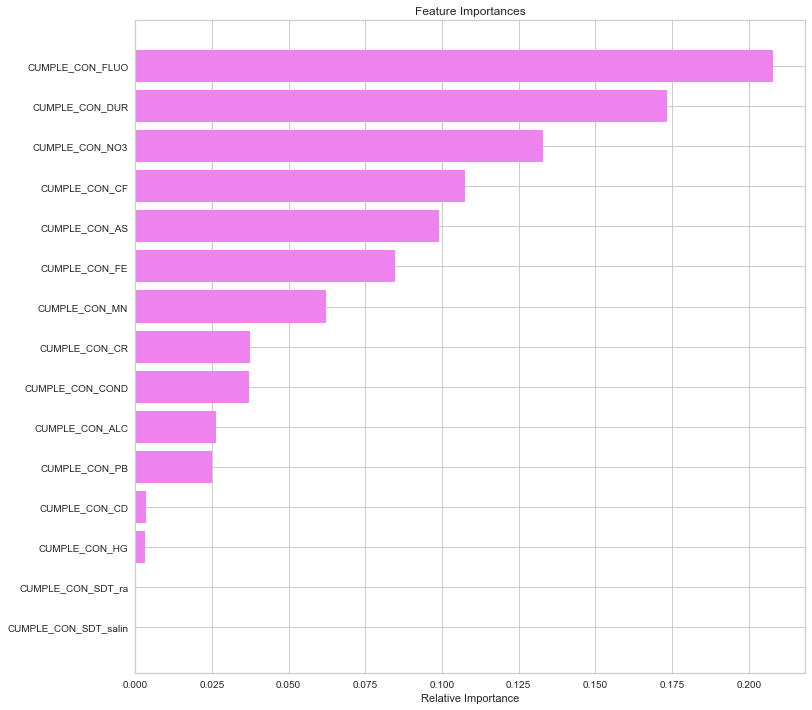

<IPython.core.display.Javascript object>

In [123]:
# Lista de nombres de variables
feature_names = list(X.columns)

# Gráfico de importancia de variables
importances = tree["m"].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### b) Random Forest.

In [108]:
rf_1 = Pipeline(
    steps=[
        ("preprocessor", columnasTransformer),
        ("regressor", RandomForestClassifier()),
    ]
)

kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

param_grid = {
    "regressor__n_estimators": [100, 150, 200],
    "regressor__max_depth": [11, 13, 15, 17],
    "regressor__max_features": [None, 5, 7, 9, 11],
    "regressor__random_state": [1],
}

search_rf = GridSearchCV(
    rf_1, param_grid, cv=kfold, n_jobs=-1, refit=True, scoring="accuracy"
)

search_rf.fit(X_train, np.ravel(y_train2))

print("Best parameter (CV score=%0.3f):" % search_rf.best_score_)
print(search_rf.best_params_)

Best parameter (CV score=0.988):
{'regressor__max_depth': 11, 'regressor__max_features': 9, 'regressor__n_estimators': 100, 'regressor__random_state': 1}


<IPython.core.display.Javascript object>

In [109]:
rf_model = search_rf.best_estimator_.fit(X_train, y_train2)
rf_model.score(X_test, y_pipeline.fit_transform(y_test))

1.0

<IPython.core.display.Javascript object>

## 7. Determina el grado de exactitud a través del reporte de clasificación.

In [110]:
y_pipeline.named_steps.OrdE.categories_

[array(['Amarillo', 'Rojo', 'Verde'], dtype=object)]

<IPython.core.display.Javascript object>

In [111]:
y_pred = tree_model.predict(X_test)
y_true = y_pipeline.fit_transform(y_test)
print(classification_report(y_true, y_pred, target_names=["Amarillo", "Rojo", "Verde"]))

              precision    recall  f1-score   support

    Amarillo       1.00      1.00      1.00        37
        Rojo       1.00      1.00      1.00        58
       Verde       1.00      1.00      1.00        66

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



<IPython.core.display.Javascript object>

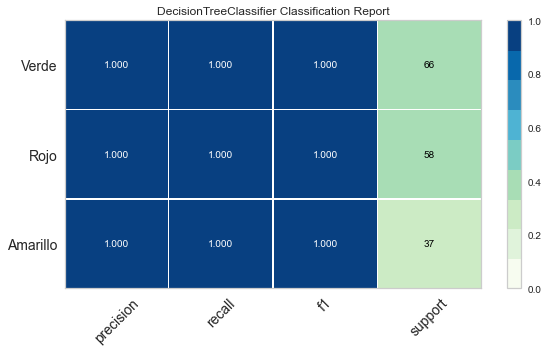

<IPython.core.display.Javascript object>

In [112]:
visualizer = ClassificationReport(
    tree_model, classes=['Amarillo','Rojo','Verde'], 
                                  cmap="GnBu", size=(600, 360),support='count',fontsize=14
    )
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_pipeline.fit_transform(y_test))
visualizer.show();


In [113]:
y_pred = rf_model.predict(X_test)
y_true = y_pipeline.fit_transform(y_test)
print(classification_report(y_true, y_pred, target_names=["Amarillo", "Rojo", "Verde"]))

              precision    recall  f1-score   support

    Amarillo       1.00      1.00      1.00        37
        Rojo       1.00      1.00      1.00        58
       Verde       1.00      1.00      1.00        66

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



<IPython.core.display.Javascript object>

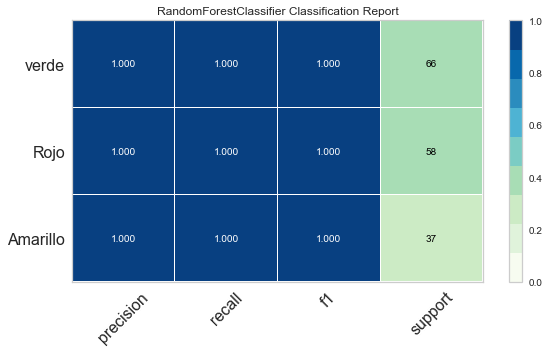

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

<IPython.core.display.Javascript object>

In [114]:
visualizer = ClassificationReport(
    rf_model,
    classes=["Amarillo", "Rojo", "verde"],
    cmap="GnBu",
    size=(600, 360),
    support="count",
    fontsize=16,
)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_pipeline.fit_transform(y_test))
visualizer.show()

## 8. Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

In [115]:
encoder_map = {0: "Rojo", 1: "Amarillo", 2: "Verde"}
y_test2 = y_pipeline.fit_transform(y_test)
y_pipeline.named_steps.OrdE.categories_

[array(['Amarillo', 'Rojo', 'Verde'], dtype=object)]

<IPython.core.display.Javascript object>

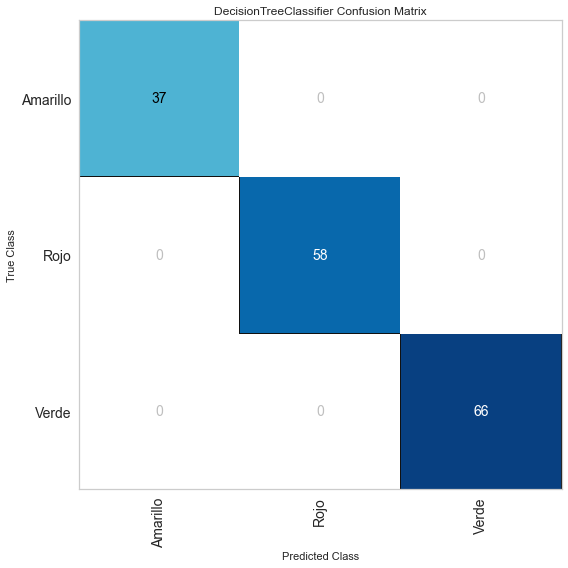

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

<IPython.core.display.Javascript object>

In [116]:
plt.figure(figsize=(8, 8))
cm_tree = ConfusionMatrix(
    tree_model, classes=["Amarillo", "Rojo", "Verde"], fontsize=14, cmap="GnBu"
)
cm_tree.fit(X_train, y_train2)
cm_tree.score(X_test, y_pipeline.fit_transform(y_test))
cm_tree.show()

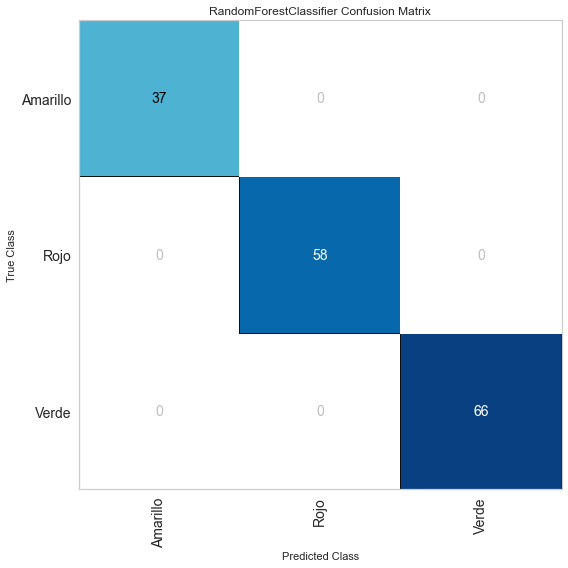

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

<IPython.core.display.Javascript object>

In [117]:
plt.figure(figsize=(8, 8))
cm_rf = ConfusionMatrix(
    rf_model, classes=["Amarillo", "Rojo", "Verde"], fontsize=14, cmap="GnBu"
)
cm_rf.fit(X_train, y_train2)
cm_rf.score(X_test, y_pipeline.fit_transform(y_test))
cm_rf.show()

In [118]:
y_pred = rf_model.predict(X_test)
y_test2 = y_pipeline.fit_transform(y_test)

<IPython.core.display.Javascript object>

In [119]:
predicciones = list(y_pred)

<IPython.core.display.Javascript object>

In [120]:
realidad = [item[0] for item in y_test2.tolist()]

<IPython.core.display.Javascript object>

In [121]:
errores = [(a, b) for a, b in enumerate(zip(realidad, predicciones)) if b[0] != b[1]]

<IPython.core.display.Javascript object>

In [122]:
errores

[]

<IPython.core.display.Javascript object>